In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

/tmp/slurm_65203318/ipykernel_235689/4189143804.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [30]:
path='/nemo/lab/gandhis/home/users/wagena/Astrocytes_editing/figures/single_cell_gene_expression/'
sc.settings.figdir = path

In [2]:
adata = sc.read_h5ad('/nemo/lab/gandhis/home/users/wagena/AIediting/raw_data/acta_neuropath_bulk/single_cell/PD_reynolds_snrnaseq_leiden.h5ad')


In [4]:
astro = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/astrocytes.csv', index_col = 0)
endo = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/endothelial.csv', index_col = 0)
micro = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/microglia.csv', index_col = 0)
neurons = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/neurons.csv', index_col = 0)
ogs = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/oligodendrocytes.csv', index_col = 0)


In [5]:
annotation = pd.concat([astro, endo, micro, neurons, ogs], axis = 0).rename(columns = {'leiden_0.2' : 'annotation_level_1'})

In [6]:
adata.obs = adata.obs.merge(annotation, left_on = 'index', right_on = 'index', how = 'left')


In [8]:
adata = adata[(adata.obs['annotation_level_1']!='drop') & (adata.obs['annotation_level_1'].isnull()==False)]
adata = adata[adata.obs['disease'].isnull()==False]

In [9]:
genes = ['ADAR', 'ADARB1', 'ADARB2']

In [12]:
# Make combined variable to plot PD and control next to each other
adata.obs['combined_group'] = adata.obs['disease'].astype(str) + '_' + adata.obs['annotation_level_1'].astype(str)


/tmp/slurm_65203318/ipykernel_235689/372870191.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['combined_group'] = adata.obs['disease'].astype(str) + '_' + adata.obs['annotation_level_1'].astype(str)


/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


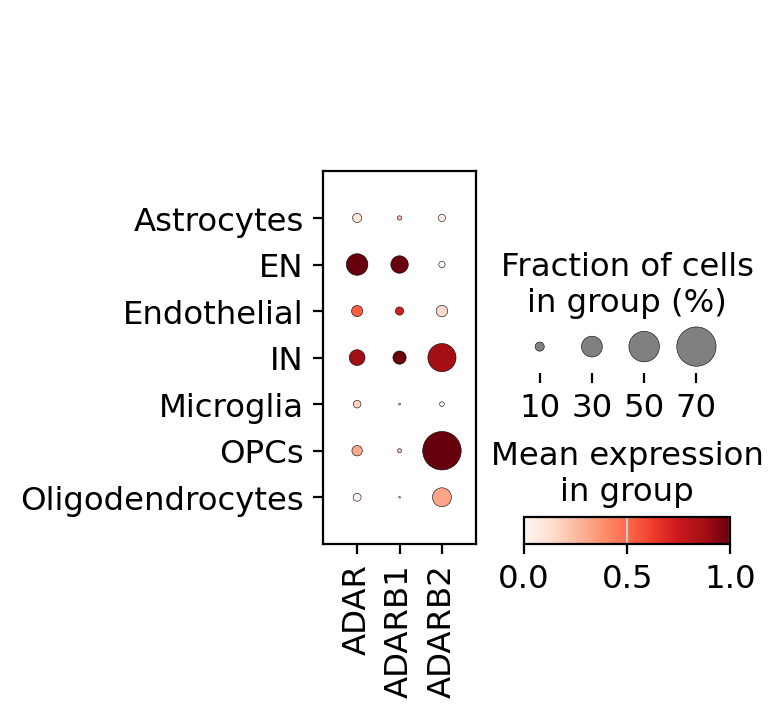

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


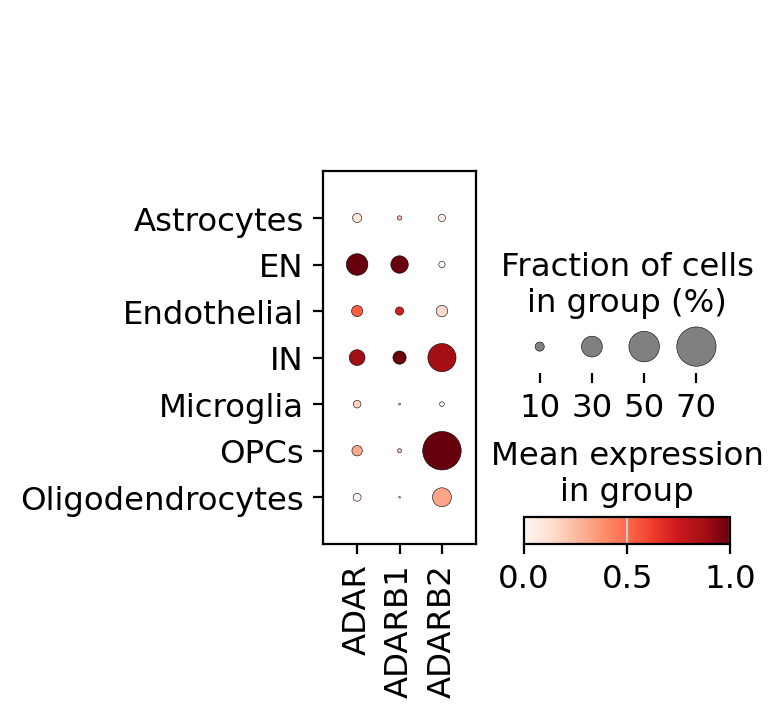

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


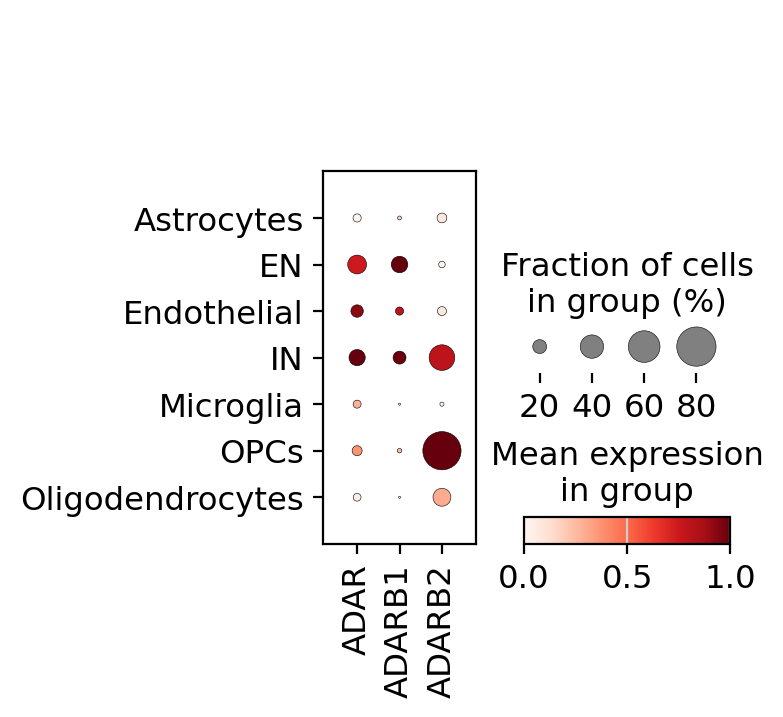

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


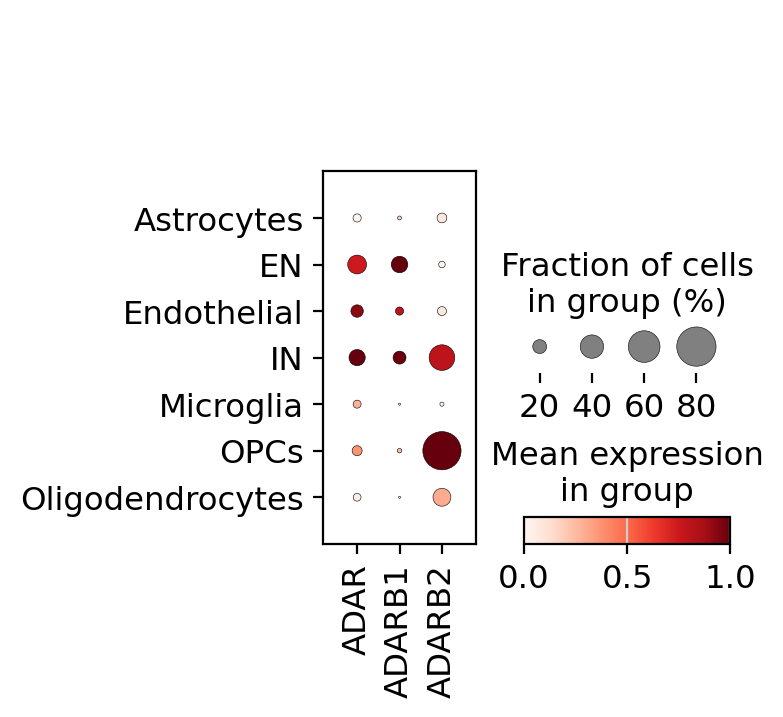

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


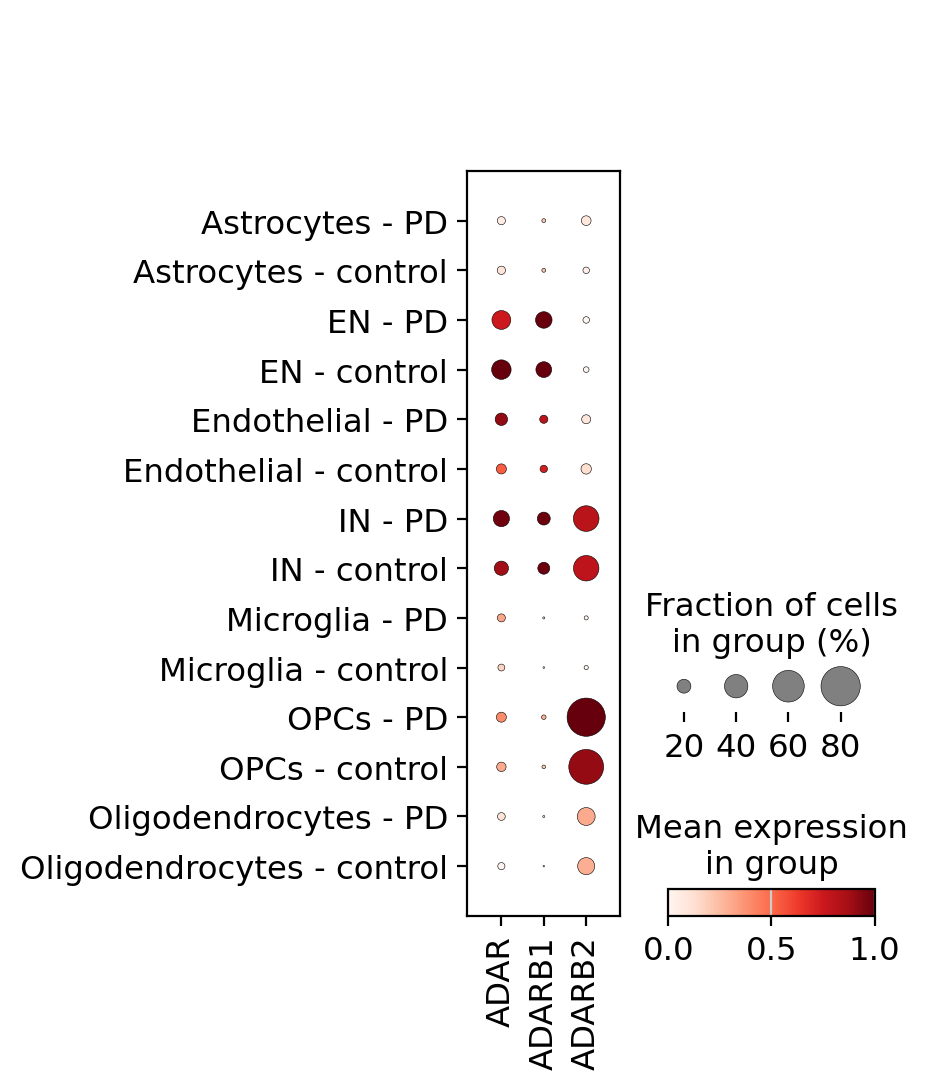

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


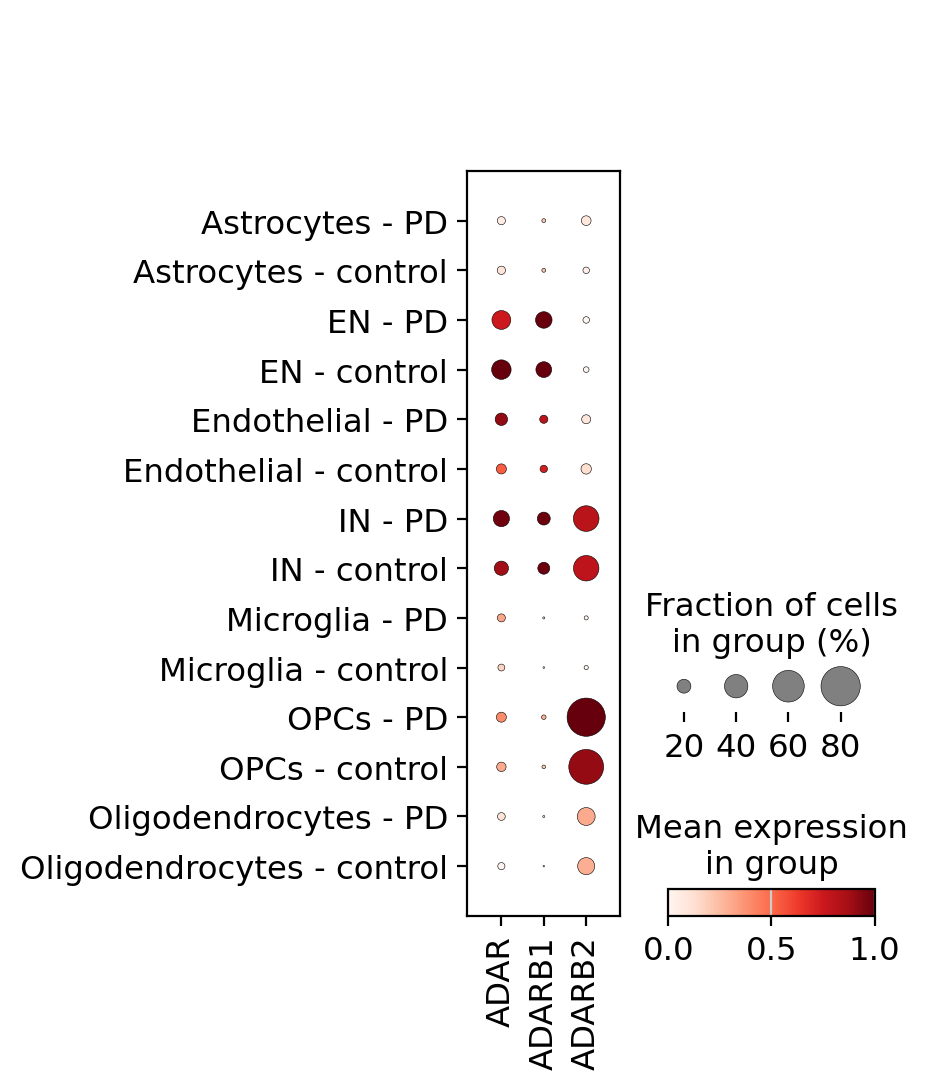

In [32]:
sc.pl.dotplot(adata[adata.obs['disease']=='control'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_control_dotplot_ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease']=='control'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_control_dotplot_ADARgenes.pdf')
sc.pl.dotplot(adata[adata.obs['disease']=='PD'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_PD_dotplot_ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease']=='PD'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_PD_dotplot_ADARgenes.pdf')
sc.pl.dotplot(adata[adata.obs['disease'].isin(['PD', 'control'])], genes, groupby='combined_group', cmap='Reds', standard_scale='var', save='ACC_combined_dotplot_ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease'].isin(['PD', 'control'])], genes, groupby='combined_group', cmap='Reds', standard_scale='var', save='ACC_combined_dotplot_ADARgenes.pdf')

In [34]:
genes = ['ADAR', 'ADARB1']


/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


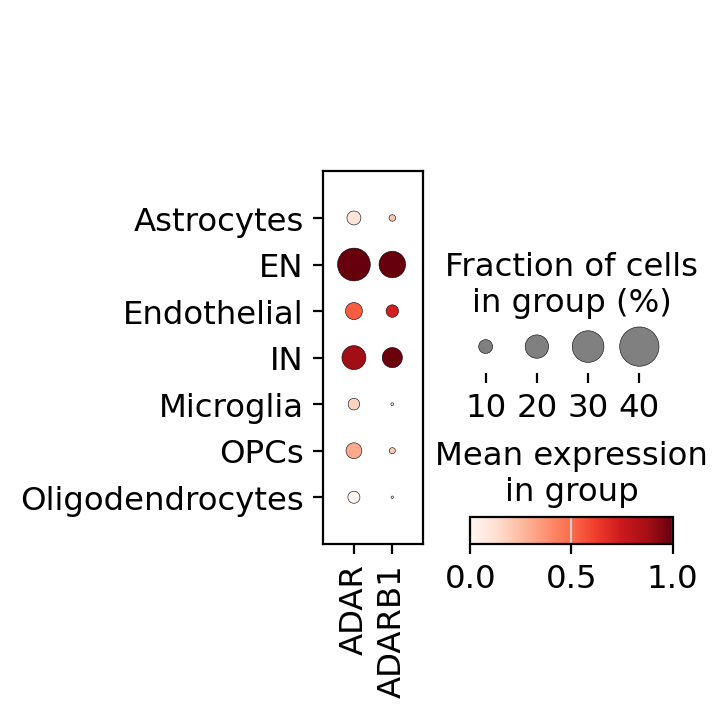

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


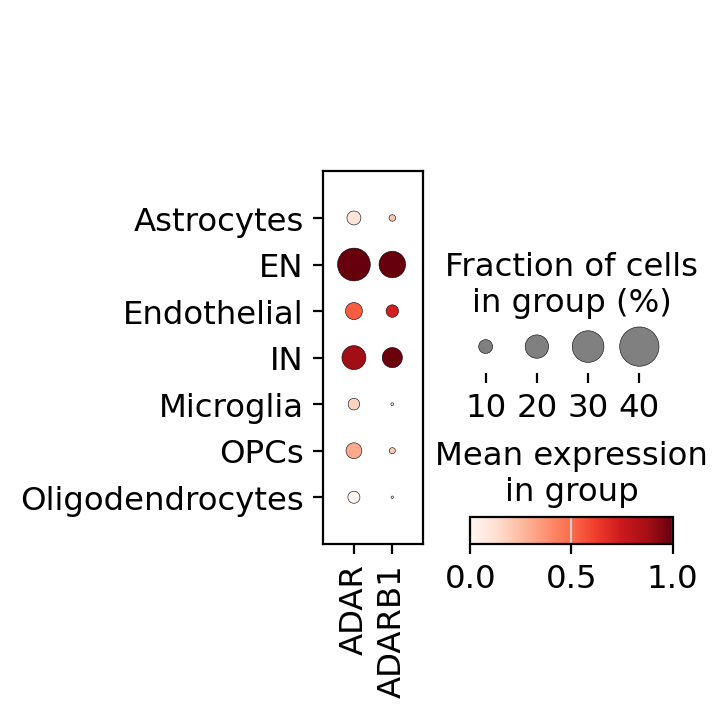

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


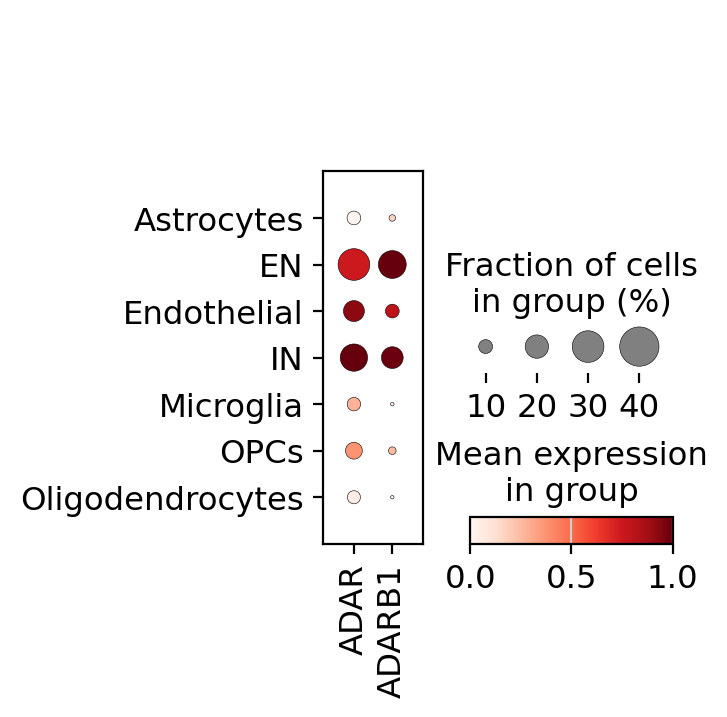

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


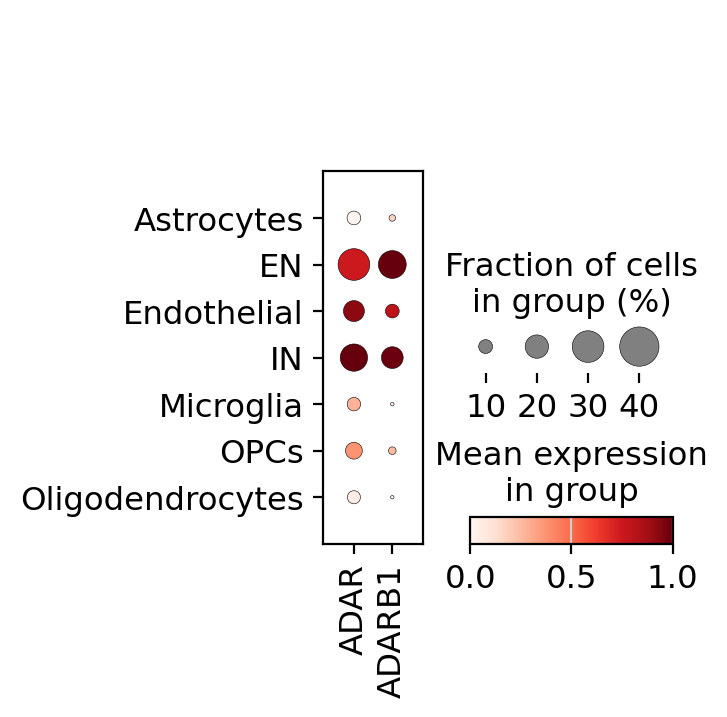

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


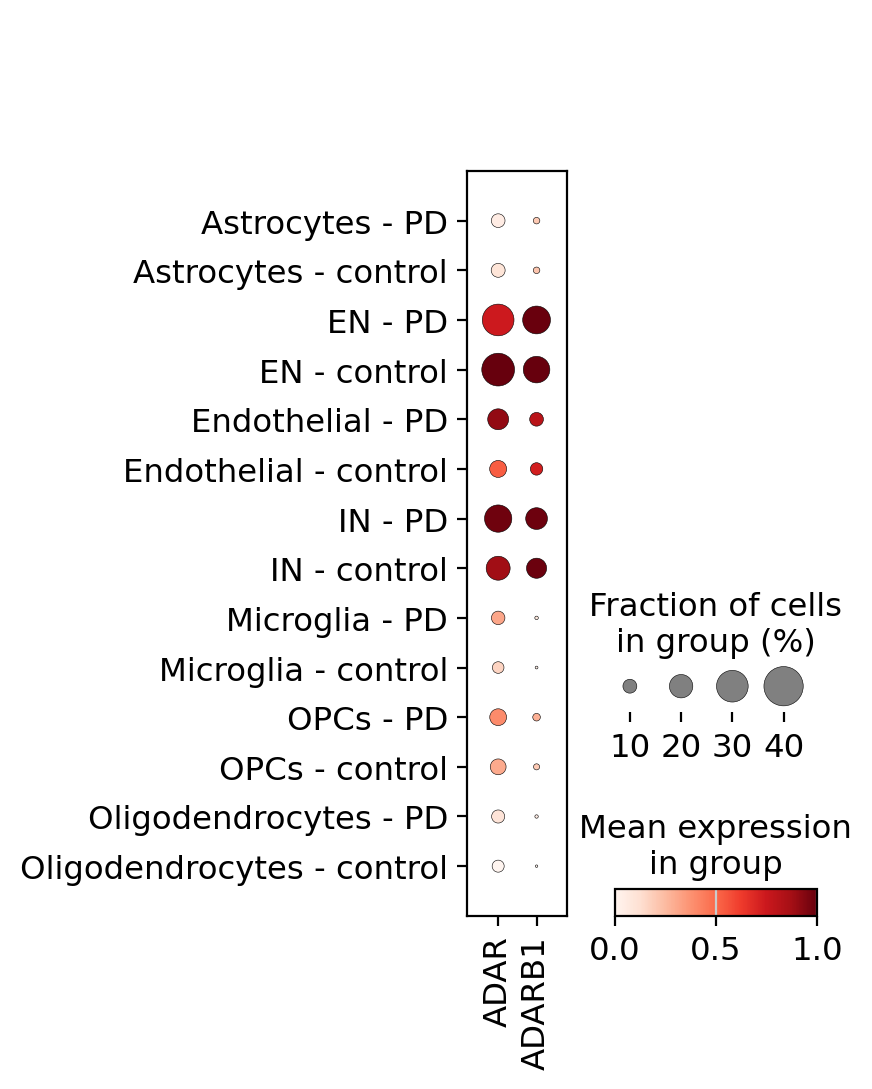

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


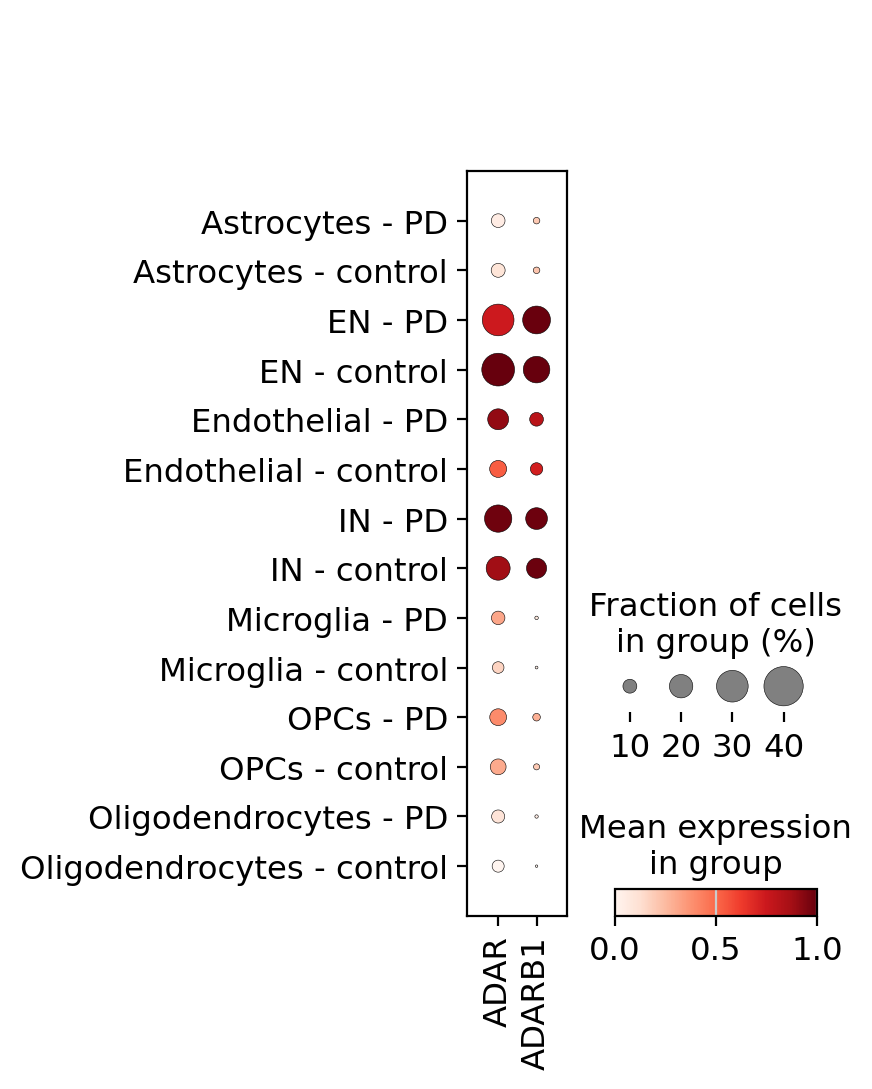

In [35]:
sc.pl.dotplot(adata[adata.obs['disease']=='control'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_control_dotplot_2ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease']=='control'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_control_dotplot_2ADARgenes.pdf')
sc.pl.dotplot(adata[adata.obs['disease']=='PD'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_PD_dotplot_2ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease']=='PD'], genes, groupby='annotation_level_1', cmap = 'Reds', standard_scale = 'var', save='ACC_PD_dotplot_2ADARgenes.pdf')
sc.pl.dotplot(adata[adata.obs['disease'].isin(['PD', 'control'])], genes, groupby='combined_group', cmap='Reds', standard_scale='var', save='ACC_combined_dotplot_2ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease'].isin(['PD', 'control'])], genes, groupby='combined_group', cmap='Reds', standard_scale='var', save='ACC_combined_dotplot_2ADARgenes.pdf')

In [36]:
astro = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/astro/astrocyte_annotation.csv', index_col = 0)
endo = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/endothelial.csv', index_col = 0)
micro = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/microglia.csv', index_col = 0)
neurons = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/neurons.csv', index_col = 0)
ogs = pd.read_csv('/nemo/lab/gandhis/home/users/grantpm/PD_LR_project/subclustering/subclustered_annotations/oligodendrocytes.csv', index_col = 0)

ann = pd.concat([astro, endo, micro, neurons, ogs], axis = 0).rename(columns = {'leiden_0.2' : 'annotation_level_2'})

In [38]:
adata.obs = adata.obs.merge(ann, left_on = 'index', right_on = 'index', how = 'left')


In [39]:
# Filter to just Astrocytes
adata = adata[(adata.obs['annotation_level_1']=='Astrocytes')]


In [45]:
# Make combined variable to plot PD and control next to each other
adata.obs['combined_astros'] = adata.obs['annotation_level_2'].astype(str) + ' - ' + adata.obs['disease'].astype(str)  


/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


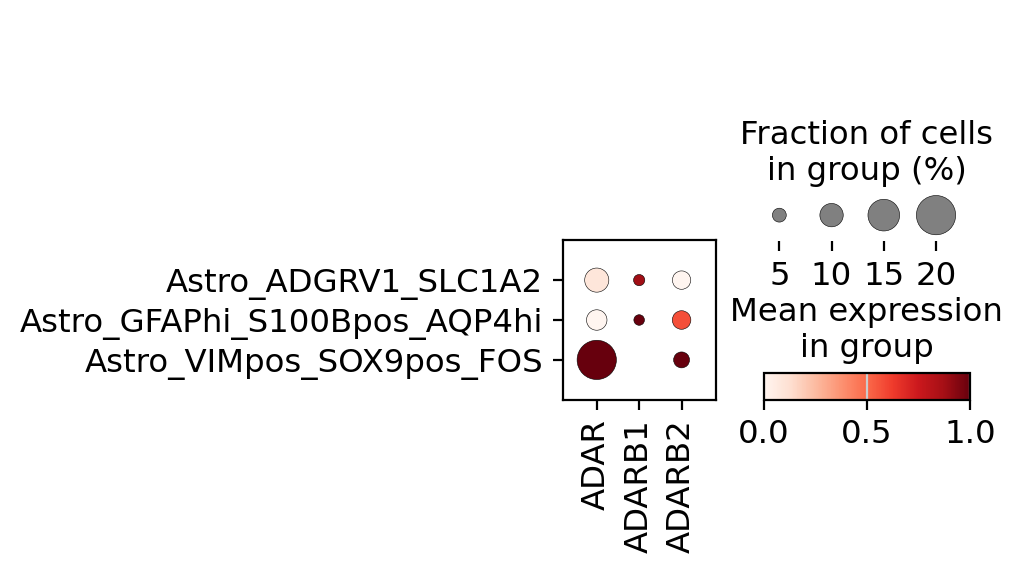

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


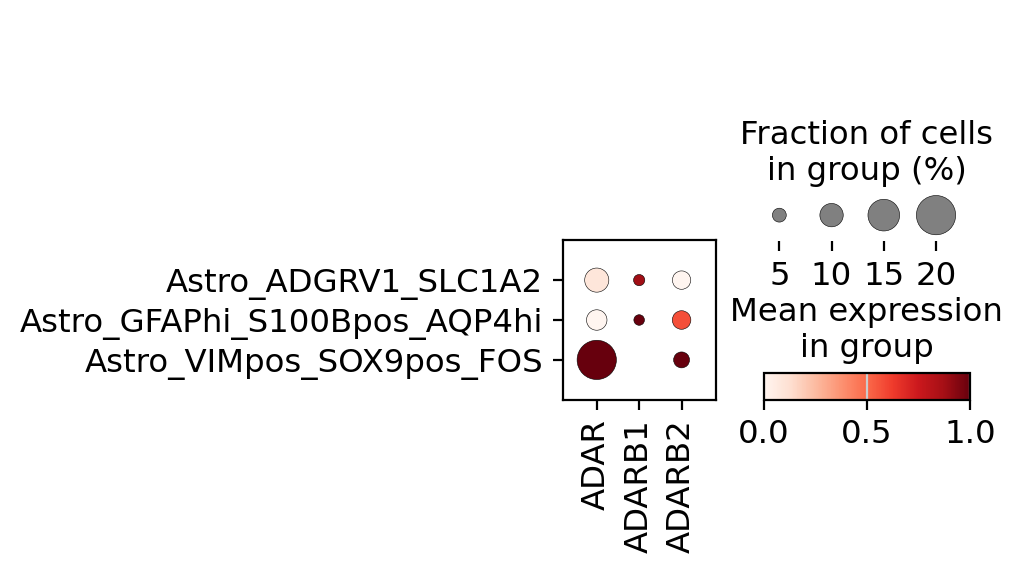

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


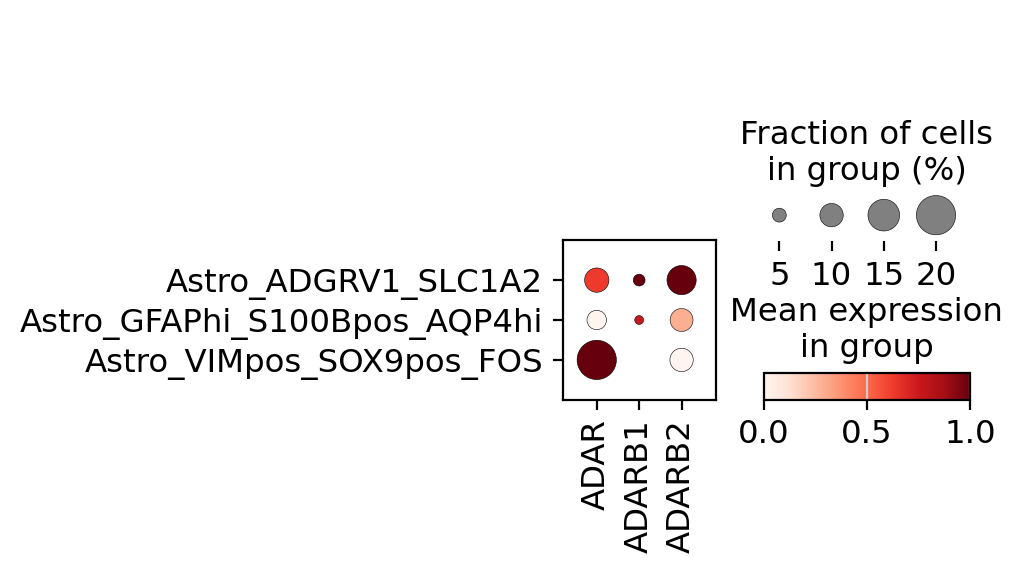

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


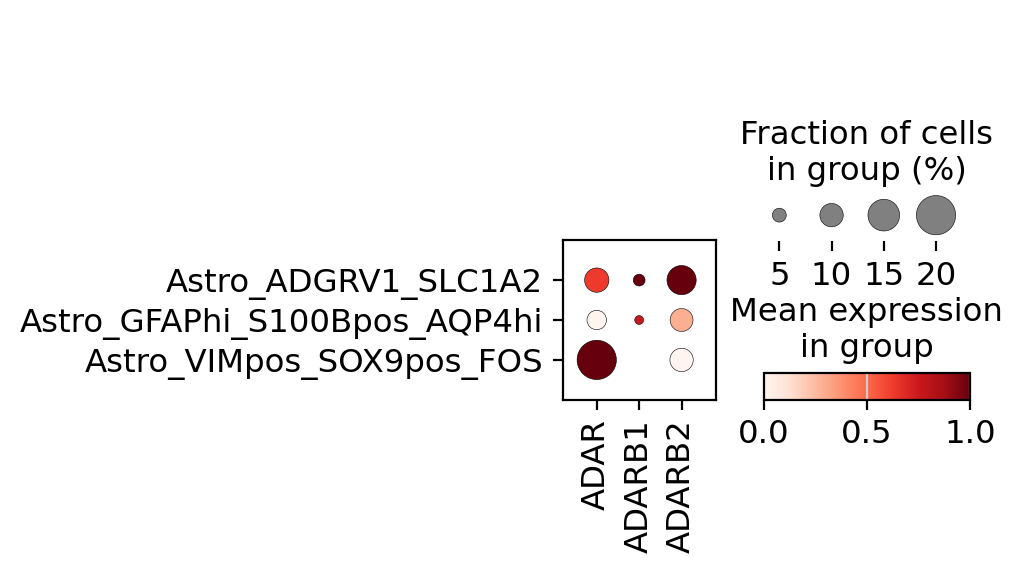

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


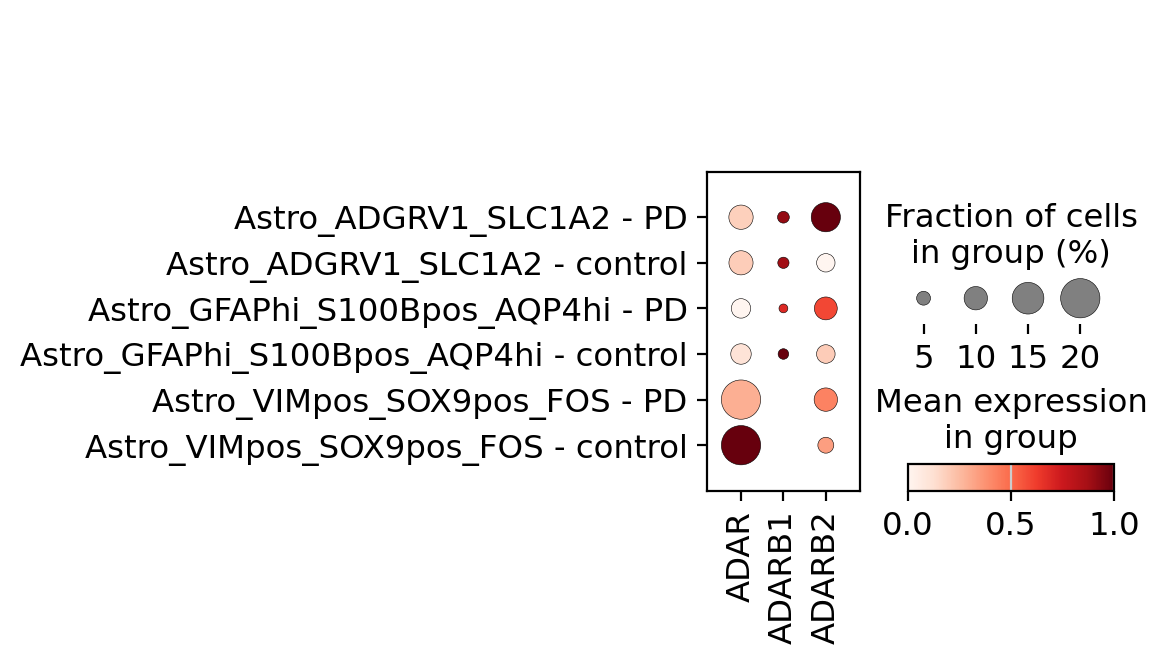

/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


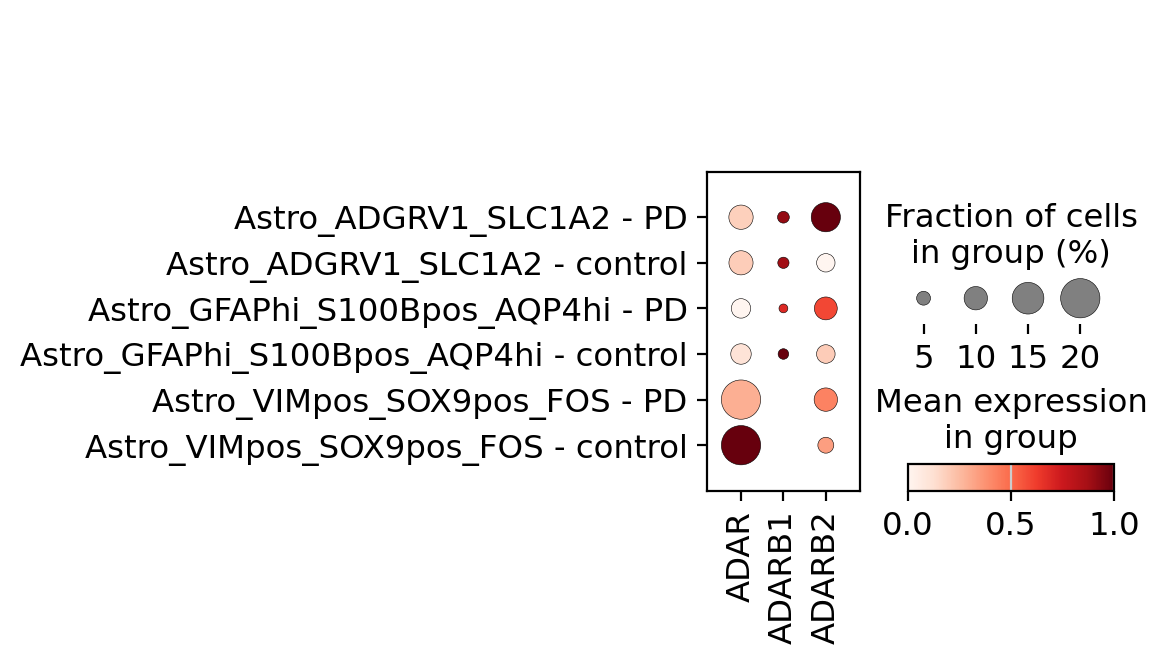

In [48]:
genes = ['ADAR', 'ADARB1', 'ADARB2']
sc.pl.dotplot(adata[adata.obs['disease']=='control'], genes, groupby='annotation_level_2', cmap = 'Reds', standard_scale = 'var', save='ACC_control_dotplot_astro_ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease']=='control'], genes, groupby='annotation_level_2', cmap = 'Reds', standard_scale = 'var', save='ACC_control_dotplot_astro_ADARgenes.pdf')
sc.pl.dotplot(adata[adata.obs['disease']=='PD'], genes, groupby='annotation_level_2', cmap = 'Reds', standard_scale = 'var', save='ACC_PD_dotplot__astro_ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease']=='PD'], genes, groupby='annotation_level_2', cmap = 'Reds', standard_scale = 'var', save='ACC_PD_dotplot__astro_ADARgenes.pdf')
sc.pl.dotplot(adata[adata.obs['disease'].isin(['PD', 'control'])], genes, groupby='combined_astros', cmap='Reds', standard_scale='var', save='ACC_combined_dotplot_astro_ADARgenes.png')
sc.pl.dotplot(adata[adata.obs['disease'].isin(['PD', 'control'])], genes, groupby='combined_astros', cmap='Reds', standard_scale='var', save='ACC_combined_dotplot_astro_ADARgenes.pdf')

In [63]:
adata_pd = adata[adata.obs['disease'].isin(['PD', 'control'])]
adata_pd

View of AnnData object with n_obs × n_vars = 9223 × 29248
    obs: 'sample_id', 'study', 'disease', 'tissue_type', 'region', 'patient', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_ig', 'log1p_total_counts_ig', 'pct_counts_ig', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rp', 'log1p_total_counts_rp', 'pct_counts_rp', 'mt_score', 'S_score', 'G2M_score', 'phase', 'leiden_0.2', 'leiden_0.4', 'leiden_1.0', 'annotation_level_1', 'combined_group', 'annotation_level_2', 'combined_astros'
    var: 'gene_ids-SRR10433201', 'feature_types-SRR10433201', 'genome-SRR10433201', 'gene_ids-SRR10433204', 'feature_types-SRR10433204', 'genome-SRR10433204', 'gene_ids-SRR10433205', 'feature_types-SRR10433205', 'genome-SRR10433205', 'gene_ids-SRR10433206', 'feature_types-SRR10433206', 'genome-SRR10433206', 'gene_ids-SRR10433

In [68]:

# Assuming `astrocytes` is your AnnData object filtered for astrocytes
# Convert the expression matrix to a dense DataFrame if necessary
adata_pd = adata[adata.obs['disease'].isin(['PD', 'control'])]

expr_df = pd.DataFrame(adata_pd.X, 
                       columns=adata_pd.var_names, 
                       index=adata_pd.obs_names)
expr_df['disease'] = adata_pd.obs['disease']

In [69]:
# Define your genes of interest
genes = ['ADAR', 'ADARB1', 'ADARB2']  # Adjust the list as necessary

# Calculate mean expression for each gene of interest by 'disease'
mean_expression_by_disease = expr_df.groupby('disease')[genes].mean()

print("Mean expression by disease:")
print(mean_expression_by_disease)

Mean expression by disease:
             ADAR    ADARB1    ADARB2
disease                              
PD      -0.189993 -0.143758 -0.257399
control -0.179522 -0.133506 -0.347052


/tmp/slurm_65203318/ipykernel_235689/216701621.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expression_by_disease = expr_df.groupby('disease')[genes].mean()


/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1301: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/camp/home/

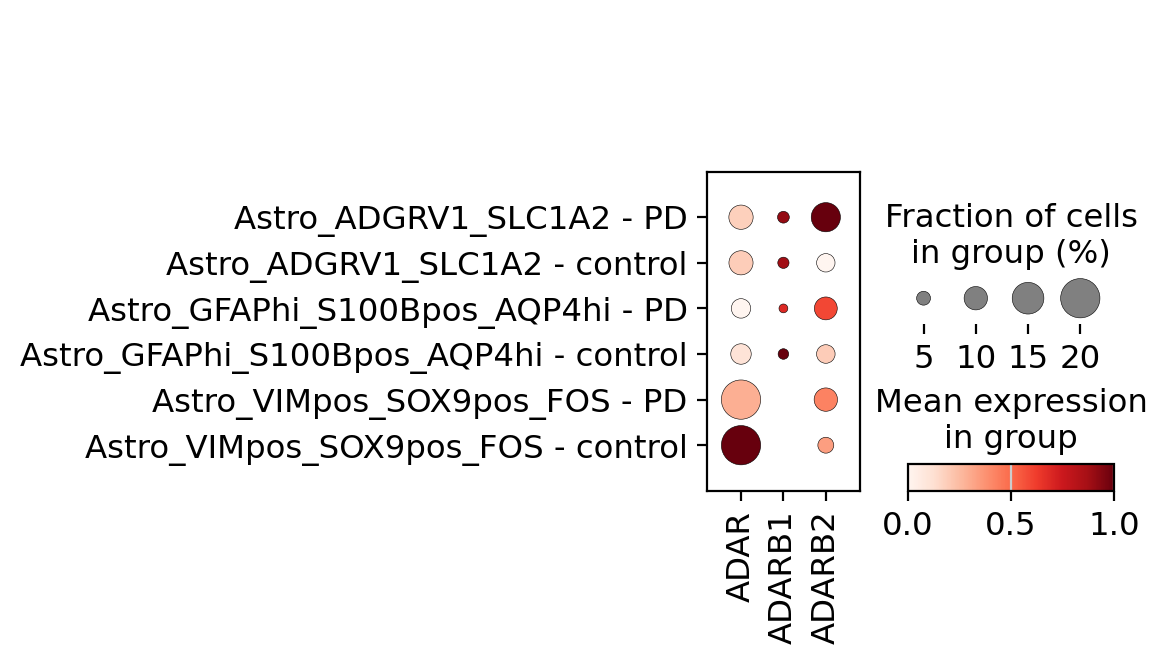

In [70]:
plot = sc.pl.dotplot(adata[adata.obs['disease'].isin(['PD', 'control'])], genes, groupby='combined_astros', cmap='Reds', standard_scale='var')

In [72]:
# Perform differential expression analysis
sc.tl.rank_genes_groups(adata, groupby='annotation_level_2', method='t-test', reference='rest', key_added='rank_genes_astrocyte_subtypes')

/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/camp/home/wagena/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(


In [73]:
print(adata.uns)

{'hvg': {'flavor': 'seurat_v3'}, 'leiden': {'params': {'n_iterations': -1, 'random_state': 0, 'resolution': 1.0}}, 'leiden_0.2_colors': array(['#ff7f0e', '#c49c94'], dtype=object), 'leiden_0.4_colors': array(['#ff7f0e', '#ad494a'], dtype=object), 'leiden_1.0_colors': array(['#1ce6ff', '#997d87', '#6b7900', '#b903aa', '#000035'],
      dtype=object), 'log1p': {}, 'neighbors': {'connectivities_key': 'connectivities', 'distances_key': 'distances', 'params': {'method': 'umap', 'metric': 'euclidean', 'n_neighbors': 45, 'n_pcs': 99, 'random_state': 0, 'use_rep': 'X_harmony'}}, 'pca': {'params': {'use_highly_variable': True, 'zero_center': True}, 'variance': array([133.98443714,  47.33901675,  36.44515161,  28.72940869,
        26.59205156,  23.39056939,  16.30682245,  15.90794452,
        12.42544752,  11.20578127,  10.58096655,   9.78092936,
         8.49532579,   7.7541608 ,   7.51635549,   7.27688208,
         6.49540342,   6.0719541 ,   5.89842323,   5.54644395,
         5.0402569 ,   4.

In [75]:
# Extract the top differentially expressed genes for a specific astrocyte subtype
astrocyte_subtype = 'Astro_ADGRV1_SLC1A2'
de_genes = adata.uns['rank_genes_astrocyte_subtypes']['names'][astrocyte_subtype]

# Print the top 10 genes
print(de_genes[:100])

['SLC1A2' 'CABLES1' 'CACNB2' 'GPC5' 'ARHGAP24' 'NRXN1' 'ZNF98' 'GRM3'
 'DLC1' 'SLC1A3' 'CADM1' 'TPD52L1' 'WIF1' 'SGCD' 'TMEM241' 'HPSE2' 'LRP1B'
 'GPM6A' 'COL5A3' 'PLCB1' 'RORA' 'LSAMP' 'PDE3B' 'RERG' 'SLC4A4' 'CADM2'
 'ERBB4' 'LINC00499' 'ADGRB3' 'NKAIN3' 'PDE4D' 'GLUL' 'PTN' 'VAV3' 'DNM3'
 'RANBP3L' 'AC092691.1' 'LRRC3B' 'GNA14' 'SOX5' 'ADGRL3' 'AC008957.2'
 'AP000462.1' 'CARMIL1' 'SLCO1C1' 'AL589740.1' 'F11-AS1' 'DNAH7' 'PREX2'
 'AC012404.1' 'FAM171B' 'AF279873.3' 'SYNE1' 'PCDH9' 'NHSL1' 'RBMS3-AS3'
 'FLRT2' 'AC073050.1' 'TRPM3' 'GABRB1' 'GABRA2' 'GNA14-AS1' 'ESRRG'
 'SLC39A12' 'MERTK' 'BRINP3' 'MACROD2' 'ADGRV1' 'SLC35F1' 'LSAMP-AS1'
 'HGF' 'GRIA2' 'GJA1' 'TOX' 'OPHN1' 'SH3RF1' 'GJB6' 'TMEM132C' 'PCDH9-AS2'
 'RORB' 'MAST4' 'TENM2' 'LGR4' 'CTNNA2' 'STXBP5' 'PIK3C2A' 'LRRC4C' 'RYR3'
 'RGS20' 'AC002429.2' 'GRAMD1C' 'ITSN1' 'RBMS3' 'SLC6A1-AS1' 'ME1'
 'SLC6A11' 'PTCHD1-AS' 'CHD9' 'PSD3' 'AC016716.2']


In [76]:
astrocyte_subtype = 'Astro_GFAPhi_S100Bpos_AQP4hi'
de_genes = adata.uns['rank_genes_astrocyte_subtypes']['names'][astrocyte_subtype]

# Print the top 10 genes
print(de_genes[:100])

['DPP10' 'LINC00609' 'DCLK1' 'TNC' 'GFAP' 'CD44' 'VCAN' 'AC073941.1'
 'HSPA1A' 'SLC38A1' 'WDR49' 'FOS' 'LINC01088' 'ID3' 'IGFBP5' 'DPP6' 'AQP1'
 'UBC' 'ADAMTSL3' 'HSPB1' 'GALNT15' 'KAZN' 'CRYAB' 'JUN' 'SNED1' 'PLEKHA5'
 'L3MBTL4' 'CERS6' 'APLNR' 'HSPA1B' 'LINC00836' 'TSHZ2' 'ADAMTS9-AS2'
 'SERPINI2' 'GPC6' 'AEBP1' 'JUNB' 'SLCO3A1' 'SLC24A4' 'SMAD9' 'GUCY1A1'
 'PFKFB2' 'ID1' 'AL162511.1' 'NAV1' 'DGKB' 'PLCE1' 'ID2' 'RHPN1' 'STXBP5L'
 'LINC01094' 'NFASC' 'H3F3B' 'ZFP36L1' 'S100B' 'SAMD11' 'MAN1C1' 'CCDC85A'
 'SPARC' 'ANGPT1' 'CPAMD8' 'DPP10-AS3' 'CYP4F12' 'ELN' 'KCNN2' 'DAAM2'
 'RASL12' 'KCNJ3' 'LPAR4' 'ROBO2' 'DPYSL3' 'GADD45B' 'ADAMTS9' 'ADM'
 'ITGB4' 'HSPB8' 'CFAP47' 'CP' 'SYNPO2' 'GAPDH' 'AQP4-AS1' 'ARHGEF4'
 'AP1S2' 'S100A6' 'FAM189A2' 'B3GAT2' 'USH1C' 'MARCH3' 'GRIA1' 'RNF19A'
 'AL031056.1' 'PLXDC2' 'ABCC4' 'ANGPTL4' 'LINC01411' 'TTN' 'KCNE4' 'SMOC1'
 'DUSP1' 'AHNAK']


In [77]:
astrocyte_subtype = 'Astro_VIMpos_SOX9pos_FOS'
de_genes = adata.uns['rank_genes_astrocyte_subtypes']['names'][astrocyte_subtype]

# Print the top 10 genes
print(de_genes[:100])

['CFAP299' 'C8orf34' 'DNAH9' 'CFAP157' 'AGBL4' 'CFAP54' 'HYDIN' 'LRRIQ1'
 'CFAP43' 'DTHD1' 'CSMD3' 'ARMC3' 'CFAP47' 'DNAH6' 'DCDC1' 'DNAH12'
 'SPAG17' 'DNAH11' 'ADGB' 'LMNTD1' 'WDR49' 'ULK4' 'TTC29' 'DYNC2H1'
 'TMEM232' 'ZBBX' 'DPP6' 'LINC01088' 'DNAAF1' 'RSPH1' 'VWA3A' 'CCDC30'
 'TTC6' 'RFX3' 'CFAP73' 'LRRC9' 'CFAP44' 'EYA4' 'PACRG' 'PPP1R42' 'DPP10'
 'SLC47A2' 'KIAA0825' 'PLEKHA5' 'WDR60' 'CFAP70' 'SPAG8' 'CASC15' 'DMD'
 'NEK11' 'LINC02055' 'SPEF2' 'NEK5' 'CFAP221' 'CAPS' 'AL357093.2' 'KAZN'
 'SERPINI2' 'DNAH7' 'SPAG16' 'SDK1' 'WDR63' 'RASGEF1B' 'ARMC4' 'KIAA2012'
 'C4orf47' 'FANK1' 'CRB1' 'DNAI1' 'CSPP1' 'AC019330.1' 'STK33' 'TOB1'
 'TMEM67' 'DRC3' 'STRBP' 'CFAP69' 'CNTN3' 'LINGO1' 'CASC2' 'NEK10'
 'TCTEX1D1' 'CFAP52' 'EFCAB2' 'TSGA10' 'DOC2A' 'DNAH3' 'LRGUK' 'SPATA17'
 'SPAG6' 'FGF14' 'EFHC1' 'CCDC146' 'CASC1' 'DNAI2' 'PLXDC2' 'VWA3B' 'GPC6'
 'RGS22' 'ROBO2']
